# Case Study: How Does a Bike-Share Navigate Speedy Success?

> <br>This project is the first **`Case Study`** of **`Google Data Analytics Capstone Project`** course available on Coursera. <br><br>
Here is the link to course: [Google Data Analytics Capstone: Complete a Case Study](https://www.coursera.org/learn/google-data-analytics-capstone/home) <br><br>
Data Source: [Divvy Data](https://divvybikes.com/system-data)<br><br>


## **PROCESS**

import libraries

In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import calendar

# pd.set_option('display.float_format', '{:.0f}'.format)
pd.reset_option('display.float_format')

from IPython.core.interactiveshell import InteractiveShell # print all the interactive output without resorting to print, not only the last result
# InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last_expr"

The dataset is stored in a monthly basis. We need to concatenate each individual month to get the comprehensive annual data for 2022.

In [65]:
import glob

input_file_pattern = "2022_divvy_tripdata/2022**-divvy-tripdata.csv"  # Specify the pattern in file names
input_file_list = glob.glob(input_file_pattern)  # Get a list of files matching the pattern
print(input_file_list)

# Initialize an empty dataframe to hold the concatenated data
dfs = pd.DataFrame()

# Iterate through the files and read them as dataframes
for i, file_name in enumerate(input_file_list):
    df = pd.read_csv(file_name, parse_dates=['started_at', 'ended_at'])
    dfs = pd.concat([dfs, df], ignore_index=True)

# Print the concatenated DataFrame
print("Files concatenated successfully into a DataFrame.")
dfs.head()

['2022_divvy_tripdata\\202201-divvy-tripdata.csv', '2022_divvy_tripdata\\202202-divvy-tripdata.csv', '2022_divvy_tripdata\\202203-divvy-tripdata.csv', '2022_divvy_tripdata\\202204-divvy-tripdata.csv', '2022_divvy_tripdata\\202205-divvy-tripdata.csv', '2022_divvy_tripdata\\202206-divvy-tripdata.csv', '2022_divvy_tripdata\\202207-divvy-tripdata.csv', '2022_divvy_tripdata\\202208-divvy-tripdata.csv', '2022_divvy_tripdata\\202209-divvy-tripdata.csv', '2022_divvy_tripdata\\202210-divvy-tripdata.csv', '2022_divvy_tripdata\\202211-divvy-tripdata.csv', '2022_divvy_tripdata\\202212-divvy-tripdata.csv']
Files concatenated successfully into a DataFrame.


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


Overview of dataset

In [66]:
print(f"This dataset contains {dfs.shape[0]} rows and {dfs.shape[1]} columns.")

This dataset contains 5667717 rows and 13 columns.


In [67]:
print(f"Below is the information of dataset: ")
dfs.info()
dfs.dtypes

Below is the information of dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 562.1+ MB


ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

Calculate the summary statictics of number and date data types

In [68]:
dfs.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng
count,5667717,5667717,5.667717e+06,5.667717e+06,5.661859e+06,5.661859e+06
mean,2022-07-20 07:21:18.741496832,2022-07-20 07:40:45.338642176,4.190222e+01,-8.764783e+01,4.190242e+01,-8.764790e+01
min,2022-01-01 00:00:05,2022-01-01 00:01:48,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01
25%,2022-05-28 19:21:05,2022-05-28 19:43:07,4.188103e+01,-8.766154e+01,4.188103e+01,-8.766260e+01
50%,2022-07-22 15:03:59,2022-07-22 15:24:44,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01
75%,2022-09-16 07:21:29,2022-09-16 07:39:03,4.193000e+01,-8.762957e+01,4.193000e+01,-8.762963e+01
max,2022-12-31 23:59:26,2023-01-02 04:56:45,4.563503e+01,-7.379648e+01,4.237000e+01,0.000000e+00
std,NaN,NaN,4.626109e-02,2.999925e-02,6.805821e-02,1.082985e-01


Checking for null values

In [69]:
dfs.isnull().sum() # check null values

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

double check for missing values, why missing?

In [70]:
dfs[dfs['start_station_name'].isnull()].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
256,857B71104B437577,electric_bike,2022-01-04 17:08:16,2022-01-04 17:12:15,NaN,NaN,Lockwood Ave & Wrightwood Ave,312,41.93,-87.76,41.930000,-87.760000,casual
979,565EEF32A9B65000,electric_bike,2022-01-11 21:51:25,2022-01-11 21:55:27,NaN,NaN,Ashland Ave & Grace St,13319,41.95,-87.65,41.950687,-87.668700,member
980,C1C1910260144C76,electric_bike,2022-01-05 03:25:22,2022-01-05 03:43:32,NaN,NaN,Ashland Ave & Grace St,13319,41.92,-87.69,41.950687,-87.668700,member
1079,A3CE921272003727,electric_bike,2022-01-18 07:01:29,2022-01-18 07:14:08,NaN,NaN,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.69,41.920771,-87.663712,member
1080,A285AF99096A99AD,electric_bike,2022-01-14 11:10:28,2022-01-14 11:20:07,NaN,NaN,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.69,41.920771,-87.663712,member


Checking misspelling words and Exploring categorical variables

In [71]:
print(f"Each ride_id is unique and contains exactly {dfs['ride_id'].str.len().unique()[0]} characters")

Each ride_id is unique and contains exactly 16 characters


Checking mistyped/invalid numeric data types

In [72]:
dfs['ride_length'] = (dfs['ended_at'] - dfs['started_at']).dt.total_seconds() / (60) # convert to mins

# as info from the Data Source's website: any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure)
dfs = dfs[dfs['ride_length'] >= 1]

dfs['ride_length'].describe()

count    5.546628e+06
mean     1.986116e+01
std      1.779629e+02
min      1.000000e+00
25%      6.066667e+00
50%      1.051667e+01
75%      1.875000e+01
max      4.138725e+04
Name: ride_length, dtype: float64

Checking for duplicated values

In [73]:
dfs.duplicated().sum() # check duplicated values

0

## Analyze and Visualize

Categorical Variables

In [74]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

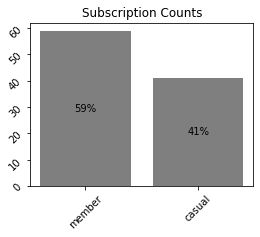

In [75]:
# Define function
def make_bar_plot(counts, title, ax):
    norm_count = (counts.value_counts(normalize=True) * 100).round()
    ax.bar(norm_count.index, norm_count, color=sns.color_palette()[7])
    ax.set_title(title)
    ax.bar_label(ax.containers[0], fmt='%.0f%%', label_type='center')
    ax.tick_params(labelrotation=45)
    return ax

# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

# Call bar_plot function for subplot
make_bar_plot(dfs['member_casual'], "Subscription Counts", ax)

# Display the plots
plt.show()


> <br>Key findings: There is a substantial proportion of existing subscribers base is now casual riders <br>=> Promising opportunity to transtion those to members to maximize profits<br><br>

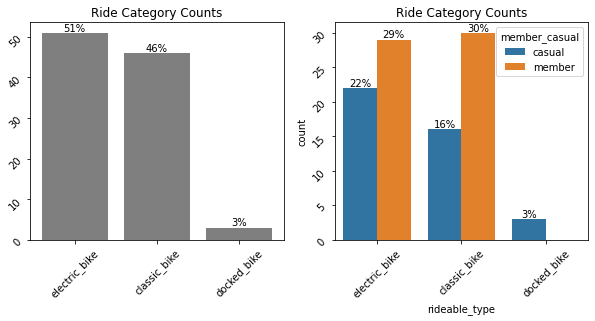

In [76]:
# Define function
def normalized_bar_plot(counts, title, ax):
    norm_count = (counts.value_counts(normalize=True) * 100).round()
    ax.bar(norm_count.index, norm_count, color=sns.color_palette()[7])
    ax.set_title(title)
    ax.bar_label(ax.containers[0], fmt='%.0f%%', label_type='edge')
    ax.tick_params(labelrotation=45)
    return ax

def bar_plot(dataframe, agg_column, title, ax):
    groupby_df = (dataframe.groupby(['member_casual', agg_column]).agg(count=('ride_id','count')) / len(dataframe) * 100).round().reset_index()
    ax = sns.barplot(data=groupby_df, x=agg_column, y='count', hue='member_casual', palette=sns.color_palette(),\
                     order=['electric_bike', 'classic_bike', 'docked_bike'])
    ax.set_title(title)
    ax.bar_label(ax.containers[0], fmt='%.0f%%', label_type='edge')
    ax.bar_label(ax.containers[1], fmt='%.0f%%', label_type='edge')
    ax.tick_params(labelrotation=45)
    return ax

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Call bar_plot function for subplot
normalized_bar_plot(dfs['rideable_type'], "Ride Category Counts", ax[0])
bar_plot(dfs, 'rideable_type', "Ride Category Counts", ax[1])

# Display the plot
plt.show()


> **Key Findings:**
    <ol> 
    <li>Members use electric and classic bikes only.</li><br>
    <li>Only casual riders use docked bikes, though it accounts for a small amount.</li><br>
    </ol>

Calculate the average/max ride_length for members and casual riders

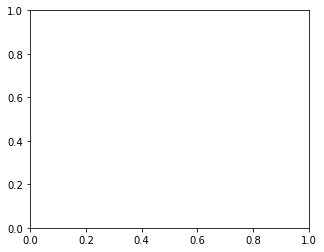

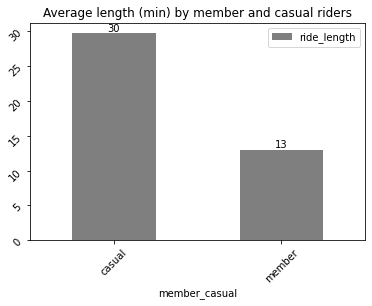

count    5.546628e+06
mean     1.986116e+01
std      1.779629e+02
min      1.000000e+00
25%      6.066667e+00
50%      1.051667e+01
75%      1.875000e+01
max      4.138725e+04
Name: ride_length, dtype: float64

In [77]:
fig, ax = plt.subplots(figsize=(5, 4))

ax = dfs.groupby('member_casual')[['ride_length']].mean().plot(kind='bar', color=sns.color_palette()[7])
plt.title('Average length (min) by member and casual riders')
plt.tick_params(labelrotation=45)

ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge')

plt.show()

dfs['ride_length'].describe()

> <br>Key findings : On average, casual riders ride longer than members<br><br>

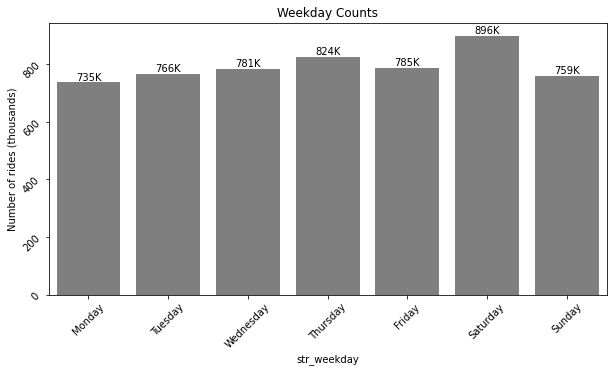

In [78]:
dfs['int_weekday'] = dfs['started_at'].dt.weekday
dfs['str_weekday'] = dfs['started_at'].dt.day_name()

fig, ax = plt.subplots(figsize=(10, 5))

groupby_dfs = dfs.groupby(['int_weekday', 'str_weekday']).size().reset_index(name='ride_id').sort_values('int_weekday')

sns.barplot(data=groupby_dfs, x='str_weekday', y=groupby_dfs['ride_id']/1000, color=sns.color_palette()[7], ax=ax)

ax.bar_label(ax.containers[0], fmt='%.0fK')
ax.set_title("Weekday Counts")
ax.tick_params(labelrotation=45)

plt.ylim(bottom=0)
plt.ylabel('Number of rides (thousands)')

plt.show()

In [79]:
import matplotlib.ticker as ticker

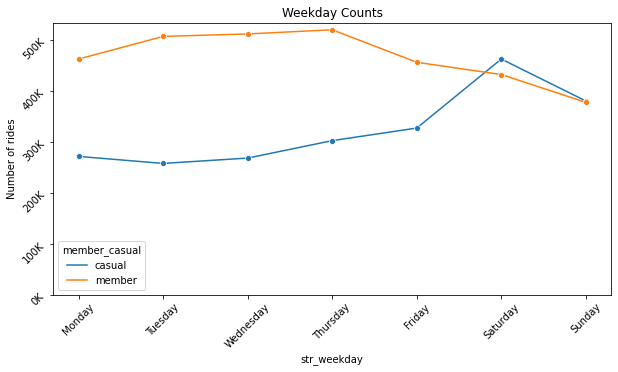

In [80]:
fig, ax = plt.subplots(figsize=(10, 5))

groupby_dfs_users = dfs.groupby(['member_casual', 'int_weekday', 'str_weekday']).size().reset_index(name='ride_id').sort_values('int_weekday')

sns.lineplot(data=groupby_dfs_users, x='str_weekday', y='ride_id', hue='member_casual', marker='o', color=sns.color_palette()[0], ax=ax)

ax.set_title("Weekday Counts")
ax.tick_params(labelrotation=45)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.ylim(bottom=0)
plt.ylabel('Number of rides')
    
plt.show()

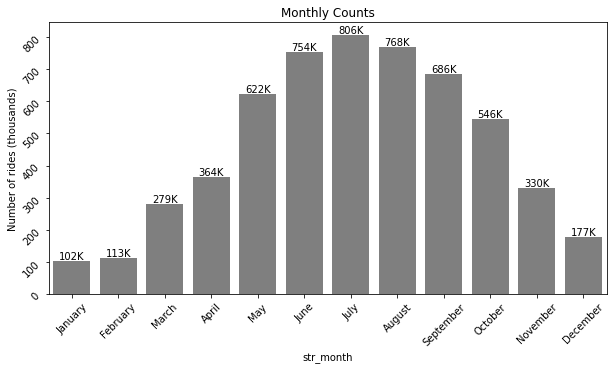

In [81]:
dfs['int_month'] = dfs['started_at'].dt.month
dfs['str_month'] = dfs['started_at'].dt.month_name()

fig, ax = plt.subplots(figsize=(10, 5))

groupby_dfs = dfs.groupby(['int_month', 'str_month']).size().reset_index(name='ride_id').sort_values('int_month')

sns.barplot(data=groupby_dfs, x='str_month', y=groupby_dfs['ride_id']/1000, color=sns.color_palette()[7], ax=ax)

ax.bar_label(ax.containers[0], fmt='%.0fK')
ax.set_title("Monthly Counts")
ax.tick_params(labelrotation=45)

plt.ylim(bottom=0)
plt.ylabel('Number of rides (thousands)')

plt.show()

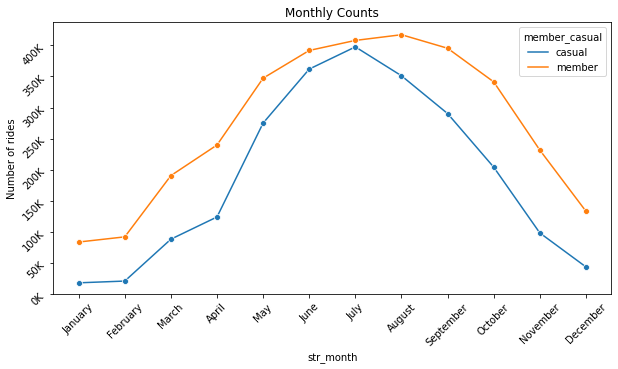

In [82]:
fig, ax = plt.subplots(figsize=(10, 5))

groupby_dfs_users = dfs.groupby(['member_casual', 'int_month', 'str_month']).size().reset_index(name='ride_id').sort_values('int_month')

sns.lineplot(data=groupby_dfs_users, x='str_month', y='ride_id', hue='member_casual', marker='o', color=sns.color_palette()[0], ax=ax)

ax.set_title("Monthly Counts")
ax.tick_params(labelrotation=45)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.ylim(bottom=0)
plt.ylabel('Number of rides')
    
plt.show()

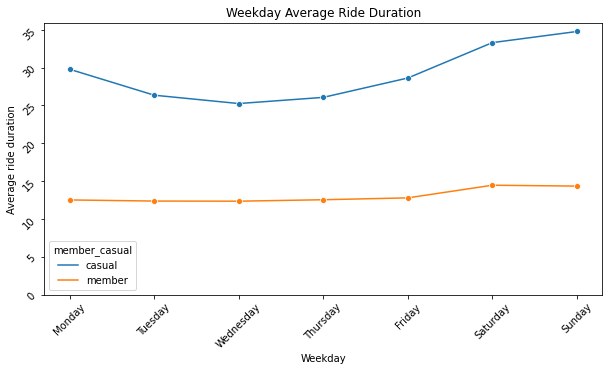

In [83]:
fig, ax = plt.subplots(figsize=(10, 5))

groupby_dfs_users = dfs.groupby(['member_casual', 'int_weekday', 'str_weekday'])[['ride_length']].mean().reset_index().sort_values('int_weekday')

sns.lineplot(data=groupby_dfs_users, x='str_weekday', y='ride_length', hue='member_casual', marker='o', color=sns.color_palette()[0], ax=ax)

ax.set_title("Weekday Average Ride Duration")
ax.tick_params(labelrotation=45)

plt.ylim(bottom=0)
plt.ylabel('Average ride duration')
plt.xlabel('Weekday')

    
plt.show()

<Axes: title={'center': 'Average Monthly Ride Duration'}, xlabel='Month', ylabel='Average Ride Duration'>

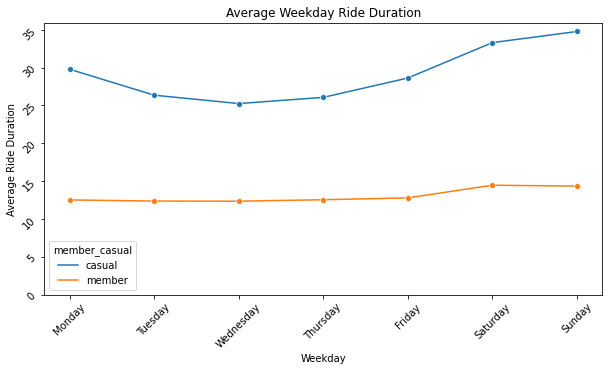

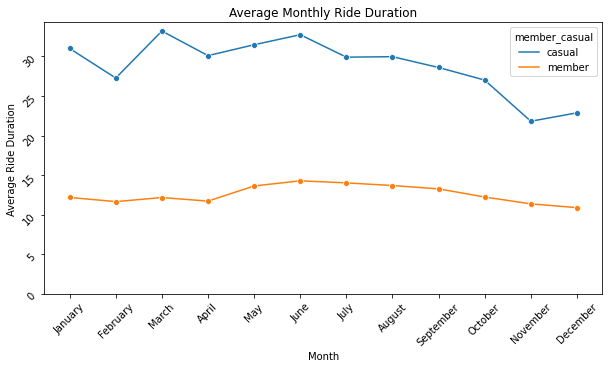

In [84]:
def datetime_line(dataframe, int_datetime, str_datetime, title, ax, xlabel):
    groupby_dfs = dataframe.groupby(['member_casual', int_datetime, str_datetime])[['ride_length']].mean().reset_index()

    groupby_dfs = groupby_dfs.sort_values(int_datetime)
    sns.lineplot(data=groupby_dfs, x=str_datetime, y='ride_length', hue='member_casual', marker='o', color=sns.color_palette()[0], ax=ax)

    ax.set_title(title)
    ax.tick_params(labelrotation=45)

    ax.set_xlabel(xlabel)
    ax.set_ylabel("Average Ride Duration")
    
    plt.ylim(bottom=0)
    
    return ax

fig, ax = plt.subplots(figsize=(10, 5))
datetime_line(dfs, 'int_weekday', 'str_weekday', 'Average Weekday Ride Duration', ax, 'Weekday')

fig, ax = plt.subplots(figsize=(10, 5))
datetime_line(dfs, 'int_month', 'str_month', 'Average Monthly Ride Duration', ax, 'Month')

> <br>Key findings: 
    <ul>
    <li> Members ride much more times than casual riders during weekday.</li>
    <li> Sharp increase in using bike-share service during weekend by casual riders, not much distinct in terms of times used compared to members.</li>
    <li> Longer average time used among casual riders compared to members, this segment rents most during Saturday and Sunday while renting duration is smaller during mid-week.</li>
    <li> No significant changes in renting duration among members during the whole week, and duration of members is relatively is smaller than casual riders.</li>
    <li>Cyclistic bikes is used the most in the summer.</li>
    </ul><br>

In [85]:
# number of casual riders using bike-share service less than 180 minutes (3 hours)
num_3_hours =  len(dfs[(dfs['member_casual']=='casual')&(dfs['ride_length']<180)]['ride_length'])

# number of casual riders 
total_casual = dfs[dfs['member_casual']=='casual']['ride_length'].describe()['count']

# pct of casual riders use bike-share service within 3 hours 
num_3_hours / total_casual

0.9931464262126112

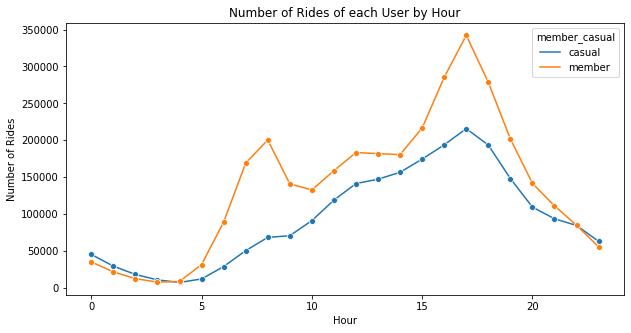

In [87]:
fig, ax = plt.subplots(figsize=(10, 5))

dfs['hour'] = dfs['started_at'].dt.hour

groupby_dfs = dfs.groupby(['member_casual', 'hour'])[['ride_id']].count().reset_index()

sns.lineplot(data=groupby_dfs, x='hour', y='ride_id', hue='member_casual', marker='o', estimator=None)

plt.title("Number of Rides of each User by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Rides")

plt.show()

Text(0, 0.5, 'Average Ride Length')

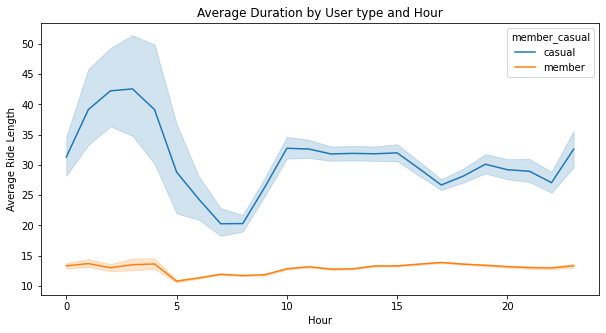

In [88]:
fig, ax = plt.subplots(figsize=(10, 5))

dfs['hour'] = dfs['started_at'].dt.hour

groupby_dfs = dfs.groupby(['member_casual', dfs['started_at'].dt.hour])[['ride_length']].mean().reset_index()

sns.lineplot(data=dfs, x=dfs['started_at'].dt.hour, y='ride_length', hue='member_casual')

plt.title("Average Duration by User type and Hour")
plt.xlabel("Hour")
plt.ylabel("Average Ride Length")

## Resources:

https://seaborn.pydata.org/tutorial/color_palettes.html